In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

In [3]:
x = np.random.rand(4,3)

In [4]:
y = np.sum(x, axis=1, keepdims=True)

In [5]:
y.shape

(4, 1)

In [6]:
import sklearn
from sklearn.impute import KNNImputer,SimpleImputer

In [7]:
df1.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df1.shape

(768, 9)

In [10]:
df1.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df1.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
print(df1[df1['BloodPressure']==0].shape[0])
print(df1[df1['Glucose']==0].shape[0])
print(df1[df1['SkinThickness']==0].shape[0])
print(df1[df1['Insulin']==0].shape[0])
print(df1[df1['BMI']==0].shape[0])

35
5
227
374
11


In [16]:
m_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
colnum=1
for col in m_col:
    df1[col]=df1[col].replace(0,np.nan)
    colnum+=1
df1.isnull().sum()/df1.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [17]:
imputer = KNNImputer(n_neighbors=14)
k_df1=imputer.fit_transform(df1)
df=pd.DataFrame(k_df1,columns=df1.columns)
df.shape

(768, 9)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,206.214286,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,58.857143,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,28.357143,210.285714,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.645740,72.321057,29.140067,152.302455,32.430366,0.471876,33.240885,0.348958
std,3.369578,30.461825,12.158060,9.171405,94.982105,6.882489,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,88.964286,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.142857,138.535714,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,34.017857,185.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [21]:
pies=['YES','NO']

In [22]:
data=['268','500']
explodes=[0.05,0.0]
colour=["red","blue"]

([<matplotlib.patches.Wedge at 0x7f53fcd10220>,
 [Text(0.5254394250500232, 1.0229435031335314, 'YES'),
  Text(-0.5025941410457839, -0.9784677457057288, 'NO')],
 [Text(0.2969875011152305, 0.5781854582928656, '34.9%'),
  Text(-0.27414225875224574, -0.533709679475852, '65.1%')])

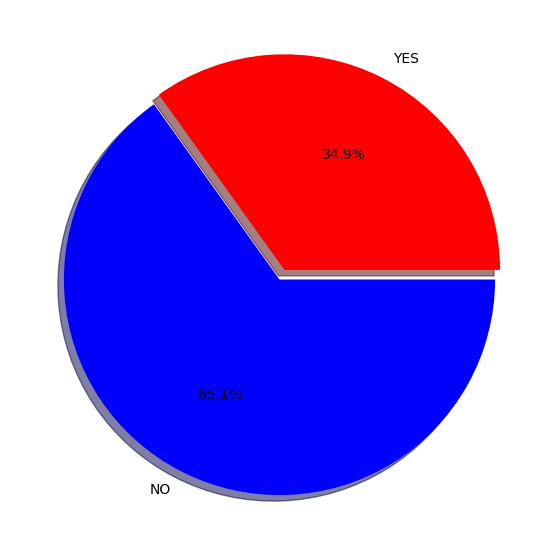

In [23]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = pies,autopct='%1.1f%%',explode=explodes,shadow=True,colors=colour)

In [24]:
sns.set_theme(style="darkgrid")

<Axes: xlabel='Outcome', ylabel='count'>

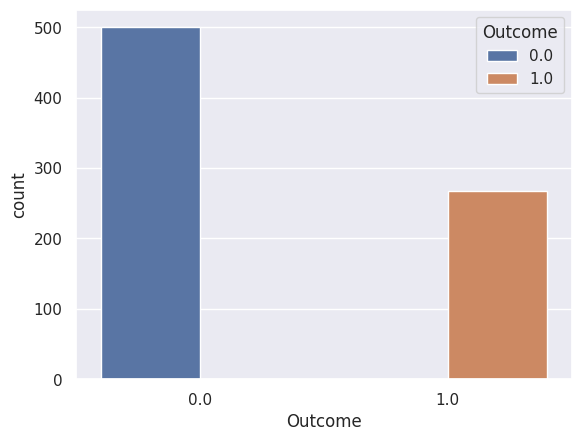

In [25]:
sns.countplot(x='Outcome',data=df,hue="Outcome")

Text(0, 0.5, 'Total count')

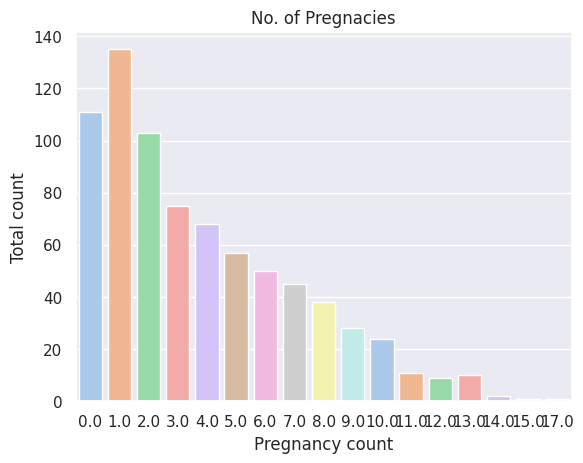

In [26]:
sns.countplot(x=df.Pregnancies,
             palette="pastel").set_title('No. of Pregnacies')
plt.xlabel("Pregnancy count")
plt.ylabel("Total count")

Text(0.5, 1.0, 'Histograph of Age')

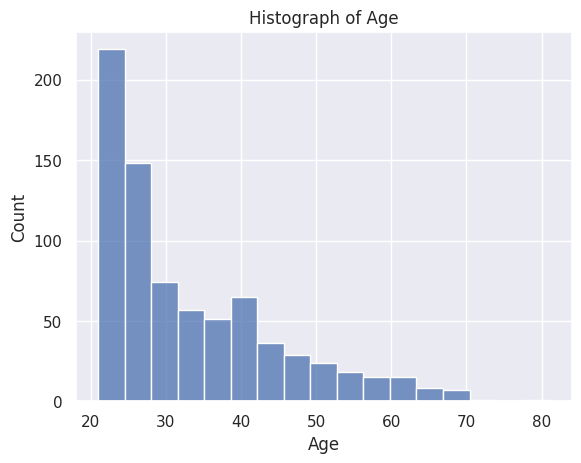

In [27]:
sns.histplot(x=df.Age).set_title("Histograph of Age")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

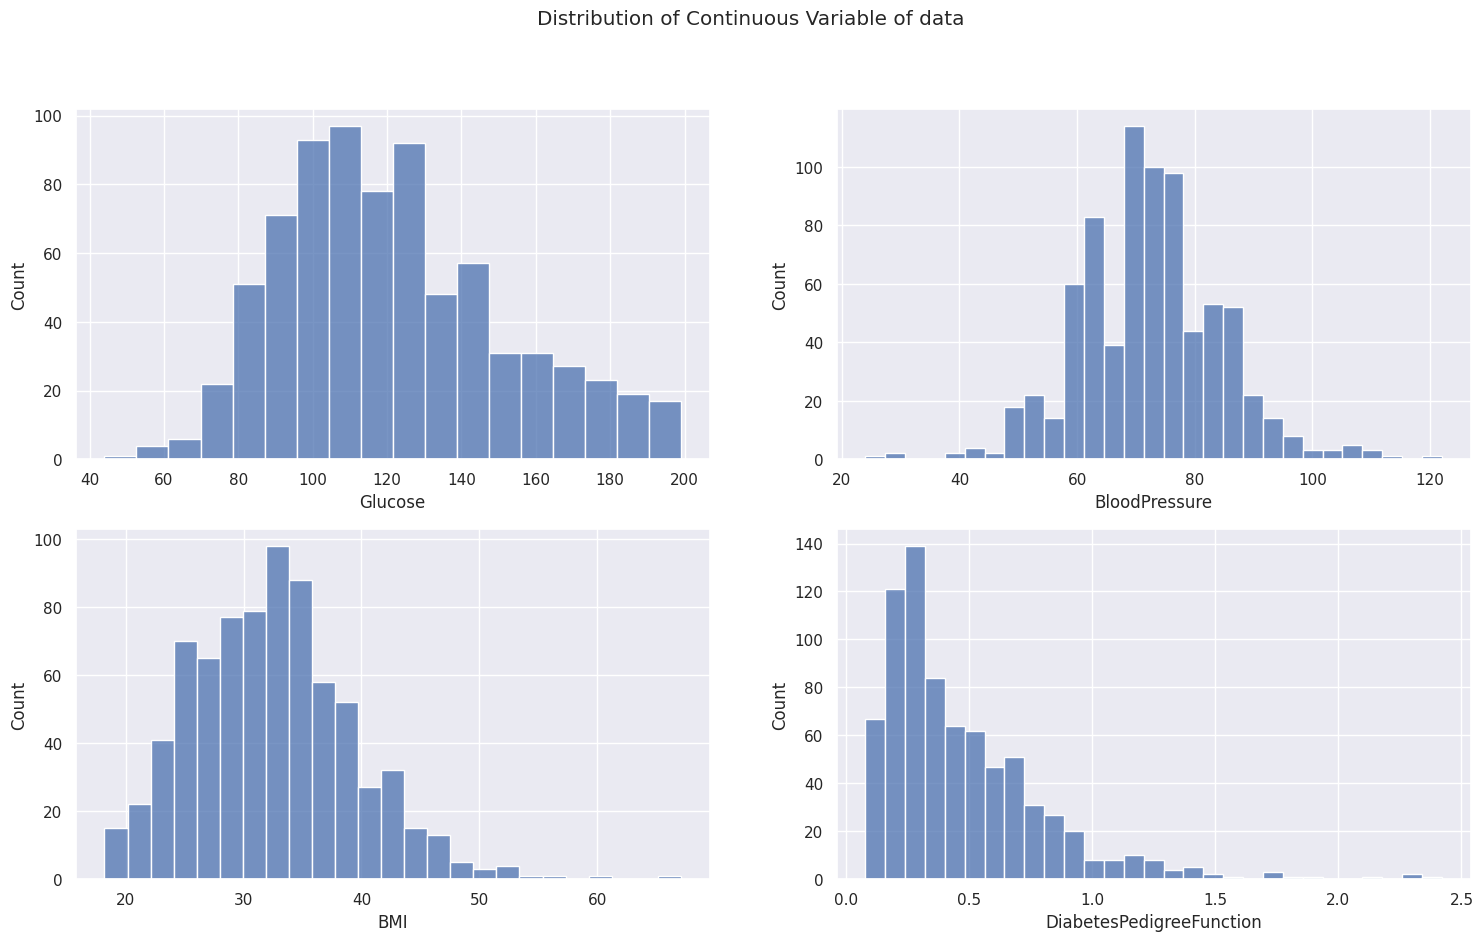

In [28]:
fig, axes = plt.subplots(2, 2, sharey=False,figsize=(18, 10))
  
fig.suptitle('Distribution of Continuous Variable of data')
  
sns.histplot(ax=axes[0, 0], x=df.Glucose)
sns.histplot(ax=axes[0, 1], x=df.BloodPressure)
sns.histplot(ax=axes[1, 0], x=df.BMI)
sns.histplot(ax=axes[1, 1], x=df.DiabetesPedigreeFunction)

In [29]:
df.loc[:,df.columns != 'Outcome'].skew(axis = 0, skipna = True)

Pregnancies                 0.901674
Glucose                     0.534696
BloodPressure               0.151333
SkinThickness               0.712863
Insulin                     2.286928
BMI                         0.607444
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction'>

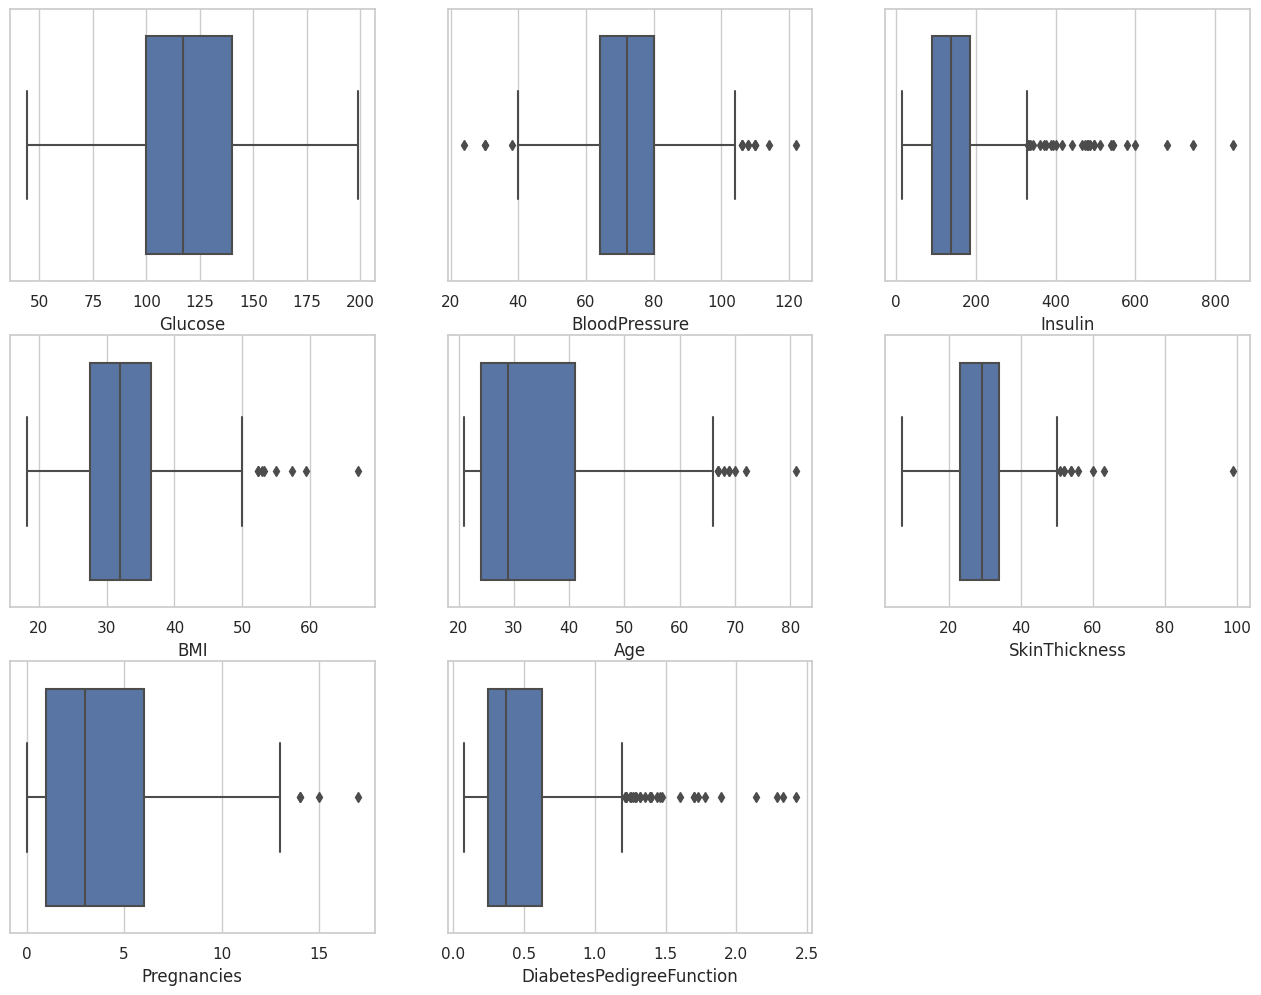

In [30]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

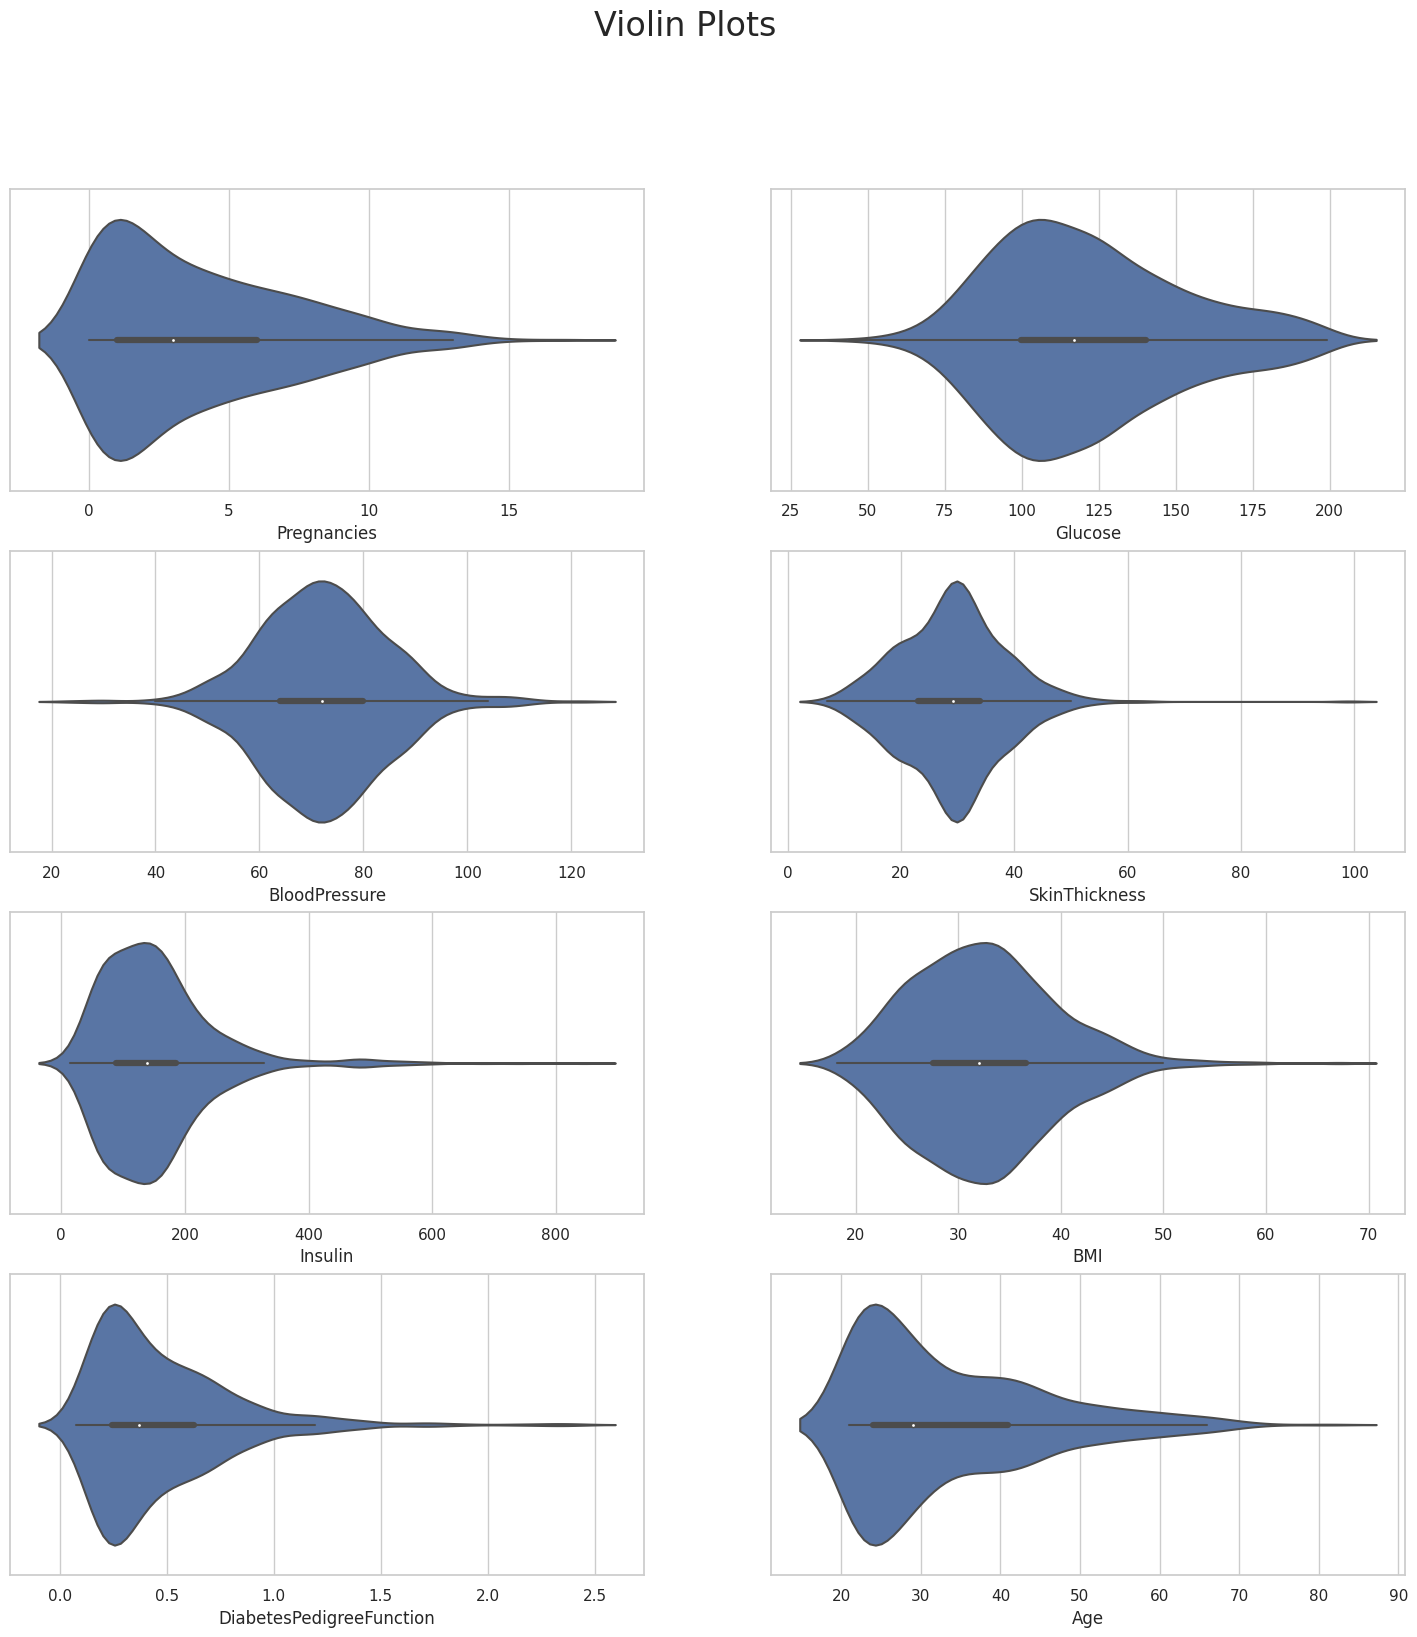

In [31]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=df,ax=ax[0,0])
sns.violinplot(x="Glucose", data=df,ax=ax[0,1])
sns.violinplot (x ='BloodPressure', data=df, ax=ax[1,0])
sns.violinplot(x='SkinThickness', data=df, ax=ax[1,1])
sns.violinplot(x='Insulin', data=df, ax=ax[2,0])
sns.violinplot(x='BMI', data=df, ax=ax[2,1])
sns.violinplot(x='DiabetesPedigreeFunction', data=df, ax=ax[3,0])
sns.violinplot(x='Age', data=df, ax=ax[3,1])
plt.show()

<Axes: >

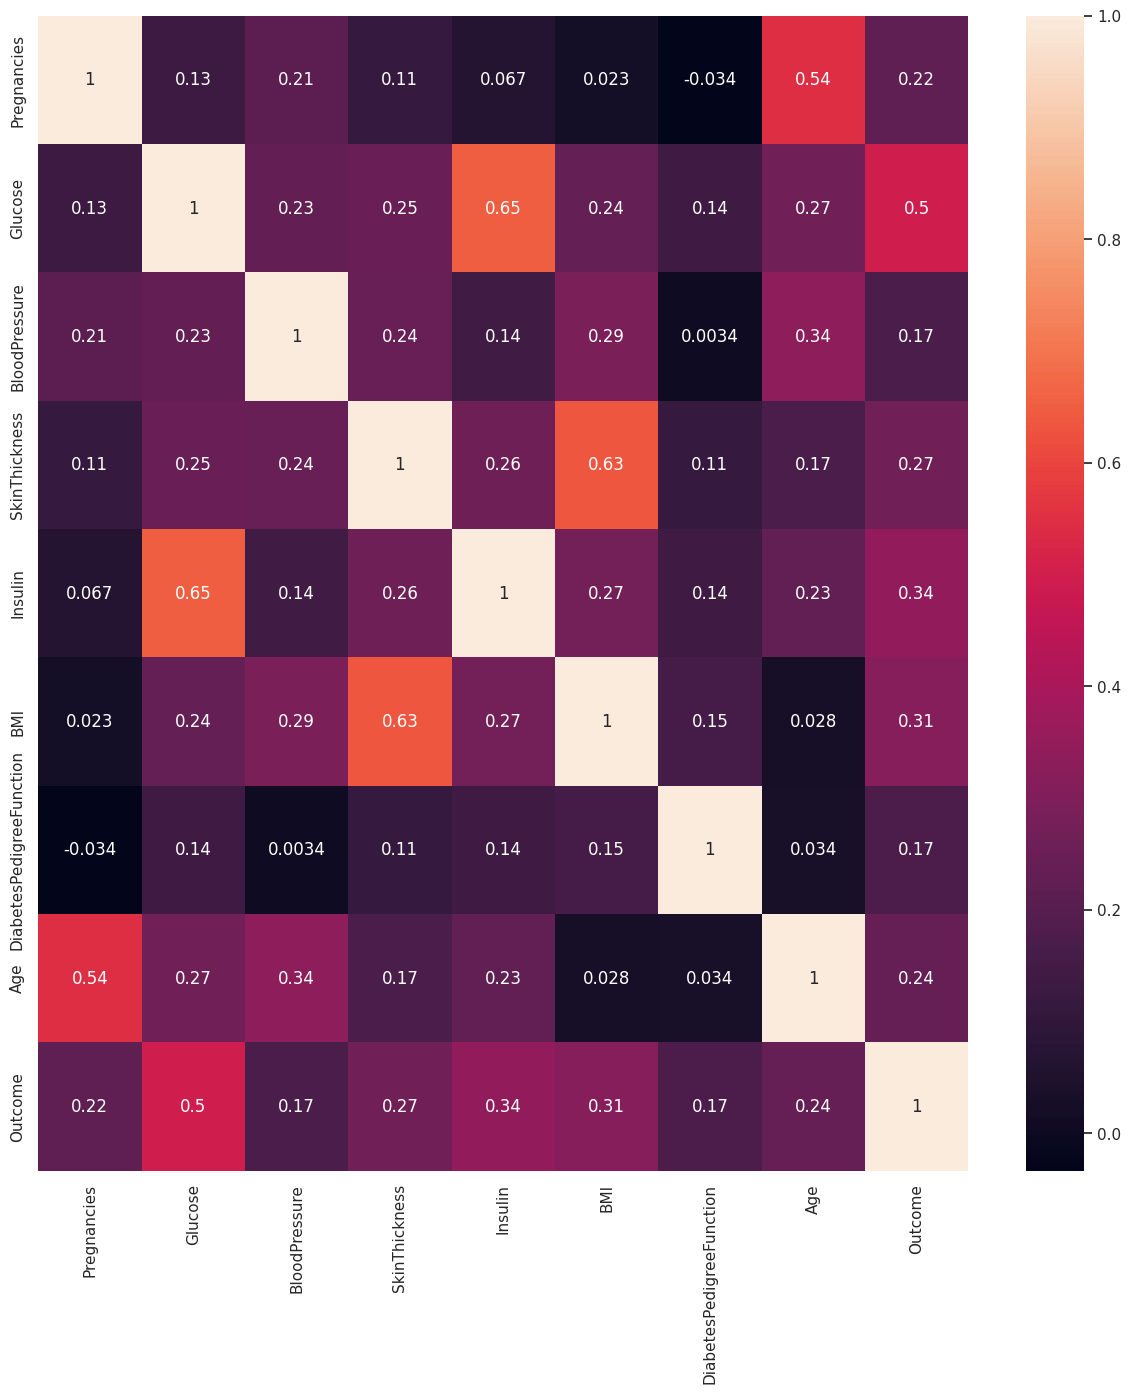

In [32]:
correlation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
661          1.0    199.0           76.0      43.000000  307.214286  42.9   
122          2.0    107.0           74.0      30.000000  100.000000  33.6   
113          4.0     76.0           62.0      27.214286   62.357143  34.0   
14           5.0    166.0           72.0      19.000000  175.000000  25.8   
529          0.0    111.0           65.0      21.000000  128.071429  24.6   
..           ...      ...            ...            ...         ...   ...   
476          2.0    105.0           80.0      45.000000  191.000000  33.7   
482          4.0     85.0           58.0      22.000000   49.000000  27.8   
230          4.0    142.0           86.0      39.142857  230.428571  44.0   
527          3.0    116.0           74.0      15.000000  105.000000  26.3   
380          1.0    107.0           72.0      30.000000   82.000000  30.8   

     DiabetesPedigreeFunction   Age  
661                     1.394  22.0  

Accuracy 72.72727272727273


<Axes: >

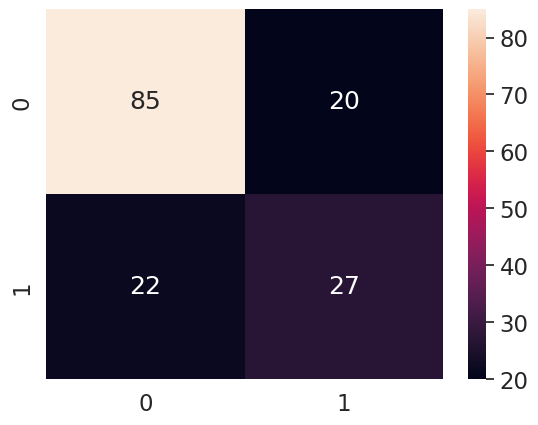

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
DT = DecisionTreeClassifier()
logmodel=DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)
print("Accuracy",DT.score(X_test,Y_test)*100)
sns.set(font_scale=1.5)
cm = confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True)

Accuracy  75.32467532467533


<Axes: >

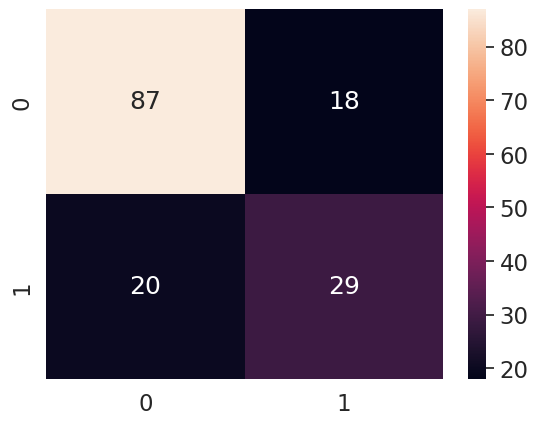

In [38]:
KNN = KNeighborsClassifier()
logmodel=KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
print("Accuracy ", KNN.score(X_test, Y_test)*100)
sns.set(font_scale=1.5)
cm=confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True)

Accuracy 79.87012987012987


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

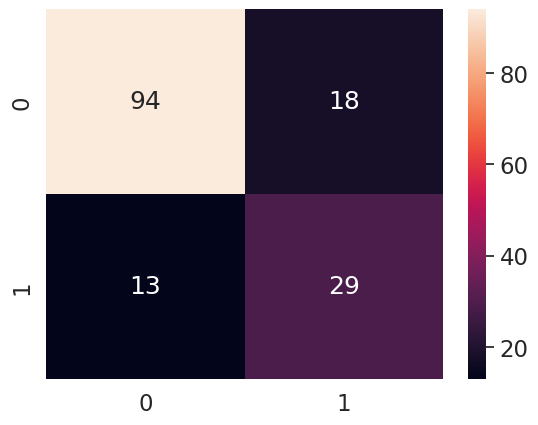

In [39]:
LR=LogisticRegression()
logmodel=LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)
print("Accuracy",LR.score(X_test,Y_test)*100)
sns.set(font_scale=1.5)
cm=confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True)

In [40]:
def classify(num):
    if num==0:
        return 'No diabetes'
    else:
      return 'diabetes'

In [41]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 k

In [42]:
import gradio as gr
import numpy as np

def predict_diabetes(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    input_array=np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
    prediction=logmodel.predict(input_array)
    output=classify(prediction[0])
    if output=='No Diabetes':
      return [(0,output)]
    else:
      return [(1,output)]

In [43]:
Pregnancies = gr.inputs.Slider(minimum=0, maximum=17, default=0, label="no. of pregnancies")
Glucose = gr.inputs.Slider(minimum=0, maximum=199, default=0, label="Glucose level")
BloodPressure = gr.inputs.Slider(minimum=0, maximum=122, default=0, label="BloodPressure")
SkinThickness = gr.inputs.Slider(minimum=0, maximum=99, default=0, label="skin thickness")
Insulin = gr.inputs.Slider(minimum=0, maximum=846, default=0, label="Insulin")
BMI = gr.inputs.Slider(minimum=0.0, maximum=67.1, default=0.0, label="BMI")
DiabetesPedigreeFunction = gr.inputs.Slider(minimum=0, maximum=2.42, default=0.781, label="DiabetesPedigreefunction")
Age = gr.inputs.Slider(minimum=21, maximum=81, default=21, label="age")

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [44]:
result=gr.outputs.HighlightedText(color_map={ "No Diabetes": "light green","Diabetes": "Pink"})

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/components.py:3644: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(


In [ ]:
gr.Interface(predict_diabetes, inputs=[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age], outputs=result,description="DIABETES __ PREDICTOR",live=True).launch(debug=True,share=True)

/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_6
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:255: UserWarning: api_name predict already exists, using predict_7
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://dadb3e28ff2c9ba384.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/gradio/routes.py", line 395, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 1193, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 916, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.9/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 86